# Relatório de análise I

## Importando a base de dados pandas

In [1]:
import pandas as pd

In [142]:
# importando
dados = pd.read_csv("aluguel.csv", sep=";")
dados.head()

Tipo               Bairro  Quartos  Vagas  Suites  Area   Valor  \
0  Apartamento               Centro        1      0       0    15   800.0   
1  Apartamento         Higienópolis        1      0       0    48   800.0   
2  Apartamento             Cachambi        2      0       0    50  1300.0   
3  Apartamento               Grajaú        2      1       0    70  1500.0   
4  Apartamento  Lins de Vasconcelos        3      1       1    90  1500.0   

   Condominio  IPTU  Valor m2 Tipo Agregado  
0       390.0  20.0     53.33   Apartamento  
1       230.0   0.0     16.67   Apartamento  
2       301.0  17.0     26.00   Apartamento  
3       642.0  74.0     21.43   Apartamento  
4       455.0  14.0     16.67   Apartamento

In [3]:
type(dados)

pandas.core.frame.DataFrame

## Informações gerais sobre a Base de Dados

In [4]:
dados.info()
dados.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19831 entries, 0 to 19830
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           19831 non-null  object 
 1   Bairro         19831 non-null  object 
 2   Quartos        19831 non-null  int64  
 3   Vagas          19831 non-null  int64  
 4   Suites         19831 non-null  int64  
 5   Area           19831 non-null  int64  
 6   Valor          19831 non-null  float64
 7   Condominio     19831 non-null  float64
 8   IPTU           19831 non-null  float64
 9   Valor m2       19831 non-null  float64
 10  Tipo Agregado  19831 non-null  object 
dtypes: float64(4), int64(4), object(3)
memory usage: 1.7+ MB


Tipo              object
Bairro            object
Quartos            int64
Vagas              int64
Suites             int64
Area               int64
Valor            float64
Condominio       float64
IPTU             float64
Valor m2         float64
Tipo Agregado     object
dtype: object

In [5]:
tipos_de_dados = pd.DataFrame(dados.dtypes, columns=["Tipos de Dados"])
tipos_de_dados.columns.name = "Variáveis"
tipos_de_dados

Variáveis     Tipos de Dados
Tipo                  object
Bairro                object
Quartos                int64
Vagas                  int64
Suites                 int64
Area                   int64
Valor                float64
Condominio           float64
IPTU                 float64
Valor m2             float64
Tipo Agregado         object

In [6]:
dados.shape

(19831, 11)

In [7]:
print(f"A base de dados apresenta {dados.shape[0]} registros (imóveis) e {dados.shape[1]} variáveis")

A base de dados apresenta 19831 registros (imóveis) e 11 variáveis


# Relatório de Análise II

## Tipos de Imóveis

In [8]:
tipo_de_imovel = dados.Tipo
type(tipo_de_imovel)

pandas.core.series.Series

In [9]:
tipo_de_imovel.drop_duplicates(inplace=True)
tipo_de_imovel

0               Apartamento
16923                  Casa
17821    Casa de Condomínio
18785          Casa de Vila
19018             Quitinete
Name: Tipo, dtype: object

## Organizando a visualização

In [10]:
tipo_de_imovel = pd.DataFrame(tipo_de_imovel)
tipo_de_imovel.index = range(tipo_de_imovel.shape[0])
tipo_de_imovel.columns.name = "Id"
tipo_de_imovel


Id                Tipo
0          Apartamento
1                 Casa
2   Casa de Condomínio
3         Casa de Vila
4            Quitinete

# Relatório de análise III

## Imóveis residenciais

In [11]:
residencial = ['Apartamento', 'Casa', 'Casa de Condomínio', 'Casa de Vila', 'Quitinete']
residencial

['Apartamento', 'Casa', 'Casa de Condomínio', 'Casa de Vila', 'Quitinete']

In [12]:
selecao = dados.Tipo.isin(residencial)
selecao

0        True
1        True
2        True
3        True
4        True
         ... 
19826    True
19827    True
19828    True
19829    True
19830    True
Name: Tipo, Length: 19831, dtype: bool

In [13]:
dados_residencial = dados[selecao]
dados_residencial

Tipo               Bairro  Quartos  Vagas  Suites  Area   Valor  \
0      Apartamento               Centro        1      0       0    15   800.0   
1      Apartamento         Higienópolis        1      0       0    48   800.0   
2      Apartamento             Cachambi        2      0       0    50  1300.0   
3      Apartamento               Grajaú        2      1       0    70  1500.0   
4      Apartamento  Lins de Vasconcelos        3      1       1    90  1500.0   
...            ...                  ...      ...    ...     ...   ...     ...   
19826    Quitinete               Glória        1      0       0    10   400.0   
19827    Quitinete             Flamengo        1      0       0    23   900.0   
19828    Quitinete               Centro        1      0       0    24  1100.0   
19829    Quitinete           Copacabana        1      0       0    22  1500.0   
19830    Quitinete               Centro        0      0       0    27   800.0   

       Condominio   IPTU  Valor m2 Tipo Agregado  
0           390.0   20.0     53.33   Apartamento  
1           230.0    0.0     16.67   Apartamento  
2           301.0   17.0     26.00   Apartamento  
3           642.0   74.0     21.43   Apartamento  
4           455.0   14.0     16.67   Apartamento  
...           ...    ...       ...           ...  
19826       107.0   10.0     40.00   Apartamento  
19827       605.0    0.0     39.13   Apartamento  
19828       323.0    0.0     45.83   Apartamento  
19829       286.0  200.0     68.18   Apartamento  
19830       350.0   25.0     29.63   Apartamento  

[19831 rows x 11 columns]

In [14]:
list(dados_residencial.Tipo.drop_duplicates())

['Apartamento', 'Casa', 'Casa de Condomínio', 'Casa de Vila', 'Quitinete']

In [15]:
dados_residencial.shape

(19831, 11)

In [16]:
dados_residencial.index = range(dados_residencial.shape[0])
dados_residencial

Tipo               Bairro  Quartos  Vagas  Suites  Area   Valor  \
0      Apartamento               Centro        1      0       0    15   800.0   
1      Apartamento         Higienópolis        1      0       0    48   800.0   
2      Apartamento             Cachambi        2      0       0    50  1300.0   
3      Apartamento               Grajaú        2      1       0    70  1500.0   
4      Apartamento  Lins de Vasconcelos        3      1       1    90  1500.0   
...            ...                  ...      ...    ...     ...   ...     ...   
19826    Quitinete               Glória        1      0       0    10   400.0   
19827    Quitinete             Flamengo        1      0       0    23   900.0   
19828    Quitinete               Centro        1      0       0    24  1100.0   
19829    Quitinete           Copacabana        1      0       0    22  1500.0   
19830    Quitinete               Centro        0      0       0    27   800.0   

       Condominio   IPTU  Valor m2 Tipo Agregado  
0           390.0   20.0     53.33   Apartamento  
1           230.0    0.0     16.67   Apartamento  
2           301.0   17.0     26.00   Apartamento  
3           642.0   74.0     21.43   Apartamento  
4           455.0   14.0     16.67   Apartamento  
...           ...    ...       ...           ...  
19826       107.0   10.0     40.00   Apartamento  
19827       605.0    0.0     39.13   Apartamento  
19828       323.0    0.0     45.83   Apartamento  
19829       286.0  200.0     68.18   Apartamento  
19830       350.0   25.0     29.63   Apartamento  

[19831 rows x 11 columns]

## Exportando a base de dados

In [17]:
dados_residencial.to_csv("aluguel_residencial.csv", sep=";", index=False)
dados_residencial_2 = pd.read_csv("aluguel_residencial.csv", sep=";")
dados_residencial_2

Tipo               Bairro  Quartos  Vagas  Suites  Area   Valor  \
0      Apartamento               Centro        1      0       0    15   800.0   
1      Apartamento         Higienópolis        1      0       0    48   800.0   
2      Apartamento             Cachambi        2      0       0    50  1300.0   
3      Apartamento               Grajaú        2      1       0    70  1500.0   
4      Apartamento  Lins de Vasconcelos        3      1       1    90  1500.0   
...            ...                  ...      ...    ...     ...   ...     ...   
19826    Quitinete               Glória        1      0       0    10   400.0   
19827    Quitinete             Flamengo        1      0       0    23   900.0   
19828    Quitinete               Centro        1      0       0    24  1100.0   
19829    Quitinete           Copacabana        1      0       0    22  1500.0   
19830    Quitinete               Centro        0      0       0    27   800.0   

       Condominio   IPTU  Valor m2 Tipo Agregado  
0           390.0   20.0     53.33   Apartamento  
1           230.0    0.0     16.67   Apartamento  
2           301.0   17.0     26.00   Apartamento  
3           642.0   74.0     21.43   Apartamento  
4           455.0   14.0     16.67   Apartamento  
...           ...    ...       ...           ...  
19826       107.0   10.0     40.00   Apartamento  
19827       605.0    0.0     39.13   Apartamento  
19828       323.0    0.0     45.83   Apartamento  
19829       286.0  200.0     68.18   Apartamento  
19830       350.0   25.0     29.63   Apartamento  

[19831 rows x 11 columns]

# Relatório de Análise IV

In [18]:
import pandas as pd
dados = pd.read_csv('aluguel_residencial.csv', sep=";")
dados.head()

Tipo               Bairro  Quartos  Vagas  Suites  Area   Valor  \
0  Apartamento               Centro        1      0       0    15   800.0   
1  Apartamento         Higienópolis        1      0       0    48   800.0   
2  Apartamento             Cachambi        2      0       0    50  1300.0   
3  Apartamento               Grajaú        2      1       0    70  1500.0   
4  Apartamento  Lins de Vasconcelos        3      1       1    90  1500.0   

   Condominio  IPTU  Valor m2 Tipo Agregado  
0       390.0  20.0     53.33   Apartamento  
1       230.0   0.0     16.67   Apartamento  
2       301.0  17.0     26.00   Apartamento  
3       642.0  74.0     21.43   Apartamento  
4       455.0  14.0     16.67   Apartamento

In [19]:
# imóveis tipo apartamento
selecao = dados.Tipo == "Apartamento"
n1 = dados[selecao].shape[0]
n1

16923

In [20]:
# imóveis tipo .*Casa.*
selecao = (dados.Tipo == "Casa") | (dados.Tipo == "Casa de Condomínio") | (dados.Tipo == "Casa de Vila") 
n2 = dados[selecao].shape[0]
n2

2095

In [21]:
# imóveis com área entre 60 e 100 m²
selecao = (dados.Area >= 60) & (dados.Area <= 100)
n3 = dados[selecao].shape[0]
n3

8362

In [22]:
# imóveis com pelo menos 4 quartos e aluguel < 2k
selecao = (dados.Quartos >= 4) & (dados.Valor < 2000)
n4 = dados[selecao].shape[0]
n4

36

In [23]:
# resultado
print(f"Nº de imóveis tipo apartamento -> {n1}")
print(f"Nº de imóveis tipo .*Casa.* -> {n2}")
print(f"Nº de imóveis com área entre 60 e 100 m² -> {n3}")
print(f"Nº de imóveis com pelo menos 4 quartos e aluguel < 2k -> {n4}")

Nº de imóveis tipo apartamento -> 16923
Nº de imóveis tipo .*Casa.* -> 2095
Nº de imóveis com área entre 60 e 100 m² -> 8362
Nº de imóveis com pelo menos 4 quartos e aluguel < 2k -> 36


# Relatório de Análise V

## Tratamento de dados

In [24]:
dados = pd.read_csv("aluguel_residencial.csv", sep=";")
dados.head()

Tipo               Bairro  Quartos  Vagas  Suites  Area   Valor  \
0  Apartamento               Centro        1      0       0    15   800.0   
1  Apartamento         Higienópolis        1      0       0    48   800.0   
2  Apartamento             Cachambi        2      0       0    50  1300.0   
3  Apartamento               Grajaú        2      1       0    70  1500.0   
4  Apartamento  Lins de Vasconcelos        3      1       1    90  1500.0   

   Condominio  IPTU  Valor m2 Tipo Agregado  
0       390.0  20.0     53.33   Apartamento  
1       230.0   0.0     16.67   Apartamento  
2       301.0  17.0     26.00   Apartamento  
3       642.0  74.0     21.43   Apartamento  
4       455.0  14.0     16.67   Apartamento

In [25]:
dados.isnull()

Tipo  Bairro  Quartos  Vagas  Suites   Area  Valor  Condominio   IPTU  \
0      False   False    False  False   False  False  False       False  False   
1      False   False    False  False   False  False  False       False  False   
2      False   False    False  False   False  False  False       False  False   
3      False   False    False  False   False  False  False       False  False   
4      False   False    False  False   False  False  False       False  False   
...      ...     ...      ...    ...     ...    ...    ...         ...    ...   
19826  False   False    False  False   False  False  False       False  False   
19827  False   False    False  False   False  False  False       False  False   
19828  False   False    False  False   False  False  False       False  False   
19829  False   False    False  False   False  False  False       False  False   
19830  False   False    False  False   False  False  False       False  False   

       Valor m2  Tipo Agregado  
0         False          False  
1         False          False  
2         False          False  
3         False          False  
4         False          False  
...         ...            ...  
19826     False          False  
19827     False          False  
19828     False          False  
19829     False          False  
19830     False          False  

[19831 rows x 11 columns]

In [26]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19831 entries, 0 to 19830
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           19831 non-null  object 
 1   Bairro         19831 non-null  object 
 2   Quartos        19831 non-null  int64  
 3   Vagas          19831 non-null  int64  
 4   Suites         19831 non-null  int64  
 5   Area           19831 non-null  int64  
 6   Valor          19831 non-null  float64
 7   Condominio     19831 non-null  float64
 8   IPTU           19831 non-null  float64
 9   Valor m2       19831 non-null  float64
 10  Tipo Agregado  19831 non-null  object 
dtypes: float64(4), int64(4), object(3)
memory usage: 1.7+ MB


In [27]:
dados[dados.Valor.isnull()]

Empty DataFrame
Columns: [Tipo, Bairro, Quartos, Vagas, Suites, Area, Valor, Condominio, IPTU, Valor m2, Tipo Agregado]
Index: []

In [28]:
A = dados.shape[0]
A
dados.dropna(subset=["Valor"], inplace=True)
B = dados.shape[0]
print(A, B)

19831 19831


In [29]:
dados[dados.Condominio.isnull()].shape[0]

0

In [30]:
selecao = (dados.Tipo == "Apartamento") & (dados.Condominio.isnull())

In [31]:
A = dados.shape[0]
dados = dados[~selecao]
B = dados.shape[0]

In [32]:
dados.fillna(0, inplace=True)

In [33]:
dados.fillna({"Condominio": 0, "IPTU": 0}, inplace=True)

In [34]:
dados.to_csv("aluguel_residencial.csv", sep=";", index=False)

# Relatório de Análise VI

## Criando novas variáveis

In [35]:
dados = pd.read_csv("aluguel_residencial.csv", sep=";")
dados["Valor Bruto"] = dados.Valor + dados.Condominio + dados.IPTU
dados.head()



Tipo               Bairro  Quartos  Vagas  Suites  Area   Valor  \
0  Apartamento               Centro        1      0       0    15   800.0   
1  Apartamento         Higienópolis        1      0       0    48   800.0   
2  Apartamento             Cachambi        2      0       0    50  1300.0   
3  Apartamento               Grajaú        2      1       0    70  1500.0   
4  Apartamento  Lins de Vasconcelos        3      1       1    90  1500.0   

   Condominio  IPTU  Valor m2 Tipo Agregado  Valor Bruto  
0       390.0  20.0     53.33   Apartamento       1210.0  
1       230.0   0.0     16.67   Apartamento       1030.0  
2       301.0  17.0     26.00   Apartamento       1618.0  
3       642.0  74.0     21.43   Apartamento       2216.0  
4       455.0  14.0     16.67   Apartamento       1969.0

In [36]:
dados["Valor m2"] = dados.Valor / dados.Area
dados.head()
dados["Valor m2"] = dados["Valor m2"].round(2)
dados.head()

Tipo               Bairro  Quartos  Vagas  Suites  Area   Valor  \
0  Apartamento               Centro        1      0       0    15   800.0   
1  Apartamento         Higienópolis        1      0       0    48   800.0   
2  Apartamento             Cachambi        2      0       0    50  1300.0   
3  Apartamento               Grajaú        2      1       0    70  1500.0   
4  Apartamento  Lins de Vasconcelos        3      1       1    90  1500.0   

   Condominio  IPTU  Valor m2 Tipo Agregado  Valor Bruto  
0       390.0  20.0     53.33   Apartamento       1210.0  
1       230.0   0.0     16.67   Apartamento       1030.0  
2       301.0  17.0     26.00   Apartamento       1618.0  
3       642.0  74.0     21.43   Apartamento       2216.0  
4       455.0  14.0     16.67   Apartamento       1969.0

In [37]:
dados["Valor Bruto m2"] = (dados["Valor Bruto"] / dados.Area).round(2)
dados.head()

Tipo               Bairro  Quartos  Vagas  Suites  Area   Valor  \
0  Apartamento               Centro        1      0       0    15   800.0   
1  Apartamento         Higienópolis        1      0       0    48   800.0   
2  Apartamento             Cachambi        2      0       0    50  1300.0   
3  Apartamento               Grajaú        2      1       0    70  1500.0   
4  Apartamento  Lins de Vasconcelos        3      1       1    90  1500.0   

   Condominio  IPTU  Valor m2 Tipo Agregado  Valor Bruto  Valor Bruto m2  
0       390.0  20.0     53.33   Apartamento       1210.0           80.67  
1       230.0   0.0     16.67   Apartamento       1030.0           21.46  
2       301.0  17.0     26.00   Apartamento       1618.0           32.36  
3       642.0  74.0     21.43   Apartamento       2216.0           31.66  
4       455.0  14.0     16.67   Apartamento       1969.0           21.88

In [38]:
casa = ["Casa", "Casa de Condomínio", "Casa de Vila"]
dados["Tipo Agregado"] = dados.Tipo.apply(lambda x: "Casa" if x in casa else "Apartamento")
dados

Tipo               Bairro  Quartos  Vagas  Suites  Area   Valor  \
0      Apartamento               Centro        1      0       0    15   800.0   
1      Apartamento         Higienópolis        1      0       0    48   800.0   
2      Apartamento             Cachambi        2      0       0    50  1300.0   
3      Apartamento               Grajaú        2      1       0    70  1500.0   
4      Apartamento  Lins de Vasconcelos        3      1       1    90  1500.0   
...            ...                  ...      ...    ...     ...   ...     ...   
19826    Quitinete               Glória        1      0       0    10   400.0   
19827    Quitinete             Flamengo        1      0       0    23   900.0   
19828    Quitinete               Centro        1      0       0    24  1100.0   
19829    Quitinete           Copacabana        1      0       0    22  1500.0   
19830    Quitinete               Centro        0      0       0    27   800.0   

       Condominio   IPTU  Valor m2 Tipo Agregado  Valor Bruto  Valor Bruto m2  
0           390.0   20.0     53.33   Apartamento       1210.0           80.67  
1           230.0    0.0     16.67   Apartamento       1030.0           21.46  
2           301.0   17.0     26.00   Apartamento       1618.0           32.36  
3           642.0   74.0     21.43   Apartamento       2216.0           31.66  
4           455.0   14.0     16.67   Apartamento       1969.0           21.88  
...           ...    ...       ...           ...          ...             ...  
19826       107.0   10.0     40.00   Apartamento        517.0           51.70  
19827       605.0    0.0     39.13   Apartamento       1505.0           65.43  
19828       323.0    0.0     45.83   Apartamento       1423.0           59.29  
19829       286.0  200.0     68.18   Apartamento       1986.0           90.27  
19830       350.0   25.0     29.63   Apartamento       1175.0           43.52  

[19831 rows x 13 columns]

## Excluindo variáveis

In [39]:
dados_aux = pd.DataFrame(dados[["Tipo Agregado", "Valor m2", "Valor Bruto", "Valor Bruto m2"]])
dados_aux.head()

Tipo Agregado  Valor m2  Valor Bruto  Valor Bruto m2
0   Apartamento     53.33       1210.0           80.67
1   Apartamento     16.67       1030.0           21.46
2   Apartamento     26.00       1618.0           32.36
3   Apartamento     21.43       2216.0           31.66
4   Apartamento     16.67       1969.0           21.88

In [40]:
#dados.drop(["Valor Bruto", "Valor Bruto m2"], axis=1, inplace=True)

In [41]:
dados

Tipo               Bairro  Quartos  Vagas  Suites  Area   Valor  \
0      Apartamento               Centro        1      0       0    15   800.0   
1      Apartamento         Higienópolis        1      0       0    48   800.0   
2      Apartamento             Cachambi        2      0       0    50  1300.0   
3      Apartamento               Grajaú        2      1       0    70  1500.0   
4      Apartamento  Lins de Vasconcelos        3      1       1    90  1500.0   
...            ...                  ...      ...    ...     ...   ...     ...   
19826    Quitinete               Glória        1      0       0    10   400.0   
19827    Quitinete             Flamengo        1      0       0    23   900.0   
19828    Quitinete               Centro        1      0       0    24  1100.0   
19829    Quitinete           Copacabana        1      0       0    22  1500.0   
19830    Quitinete               Centro        0      0       0    27   800.0   

       Condominio   IPTU  Valor m2 Tipo Agregado  Valor Bruto  Valor Bruto m2  
0           390.0   20.0     53.33   Apartamento       1210.0           80.67  
1           230.0    0.0     16.67   Apartamento       1030.0           21.46  
2           301.0   17.0     26.00   Apartamento       1618.0           32.36  
3           642.0   74.0     21.43   Apartamento       2216.0           31.66  
4           455.0   14.0     16.67   Apartamento       1969.0           21.88  
...           ...    ...       ...           ...          ...             ...  
19826       107.0   10.0     40.00   Apartamento        517.0           51.70  
19827       605.0    0.0     39.13   Apartamento       1505.0           65.43  
19828       323.0    0.0     45.83   Apartamento       1423.0           59.29  
19829       286.0  200.0     68.18   Apartamento       1986.0           90.27  
19830       350.0   25.0     29.63   Apartamento       1175.0           43.52  

[19831 rows x 13 columns]

In [42]:
dados.to_csv("aluguel_residencial.csv", sep=";", index=False)

In [43]:
dados = pd.read_csv("aluguel_residencial.csv", sep=";")
dados

Tipo               Bairro  Quartos  Vagas  Suites  Area   Valor  \
0      Apartamento               Centro        1      0       0    15   800.0   
1      Apartamento         Higienópolis        1      0       0    48   800.0   
2      Apartamento             Cachambi        2      0       0    50  1300.0   
3      Apartamento               Grajaú        2      1       0    70  1500.0   
4      Apartamento  Lins de Vasconcelos        3      1       1    90  1500.0   
...            ...                  ...      ...    ...     ...   ...     ...   
19826    Quitinete               Glória        1      0       0    10   400.0   
19827    Quitinete             Flamengo        1      0       0    23   900.0   
19828    Quitinete               Centro        1      0       0    24  1100.0   
19829    Quitinete           Copacabana        1      0       0    22  1500.0   
19830    Quitinete               Centro        0      0       0    27   800.0   

       Condominio   IPTU  Valor m2 Tipo Agregado  Valor Bruto  Valor Bruto m2  
0           390.0   20.0     53.33   Apartamento       1210.0           80.67  
1           230.0    0.0     16.67   Apartamento       1030.0           21.46  
2           301.0   17.0     26.00   Apartamento       1618.0           32.36  
3           642.0   74.0     21.43   Apartamento       2216.0           31.66  
4           455.0   14.0     16.67   Apartamento       1969.0           21.88  
...           ...    ...       ...           ...          ...             ...  
19826       107.0   10.0     40.00   Apartamento        517.0           51.70  
19827       605.0    0.0     39.13   Apartamento       1505.0           65.43  
19828       323.0    0.0     45.83   Apartamento       1423.0           59.29  
19829       286.0  200.0     68.18   Apartamento       1986.0           90.27  
19830       350.0   25.0     29.63   Apartamento       1175.0           43.52  

[19831 rows x 13 columns]

In [44]:
dados.Valor.mean()

3465.402299430185

In [45]:
dados.Bairro.unique()

array(['Centro', 'Higienópolis', 'Cachambi', 'Grajaú',
       'Lins de Vasconcelos', 'Copacabana', 'Freguesia (Jacarepaguá)',
       'Barra da Tijuca', 'Tijuca', 'Olaria', 'Ipanema', 'Botafogo',
       'Recreio dos Bandeirantes', 'Leblon', 'Jardim Oceânico', 'Humaitá',
       'Méier', 'Vargem Pequena', 'Maracanã', 'Jacarepaguá',
       'Jardim Botânico', 'Vila Valqueire', 'Gávea', 'Cosme Velho',
       'Bonsucesso', 'Todos os Santos', 'Laranjeiras', 'Itanhangá',
       'Catete', 'Jardim Carioca', 'Praça Seca', 'Vila Isabel', 'Lagoa',
       'Taquara', 'Engenho Novo', 'Campo Grande', 'Flamengo',
       'Engenho de Dentro', 'Pilares', 'Água Santa', 'São Cristóvão',
       'Ilha do Governador', 'Vila da Penha', 'Anil', 'Vaz Lobo',
       'Madureira', 'São Francisco Xavier', 'Pechincha', 'Leme', 'Irajá',
       'Urca', 'Penha', 'São Conrado', 'Rio Comprido', 'Andaraí',
       'Quintino Bocaiúva', 'Inhaúma', 'Glória', 'Marechal Hermes',
       'Curicica', 'Moneró', 'Santa Teresa', 'Camorim'

In [46]:
bairros = dados.Bairro.unique()
bairros
selecao = dados.Bairro.isin(bairros)
dados = dados[selecao]
dados

Tipo               Bairro  Quartos  Vagas  Suites  Area   Valor  \
0      Apartamento               Centro        1      0       0    15   800.0   
1      Apartamento         Higienópolis        1      0       0    48   800.0   
2      Apartamento             Cachambi        2      0       0    50  1300.0   
3      Apartamento               Grajaú        2      1       0    70  1500.0   
4      Apartamento  Lins de Vasconcelos        3      1       1    90  1500.0   
...            ...                  ...      ...    ...     ...   ...     ...   
19826    Quitinete               Glória        1      0       0    10   400.0   
19827    Quitinete             Flamengo        1      0       0    23   900.0   
19828    Quitinete               Centro        1      0       0    24  1100.0   
19829    Quitinete           Copacabana        1      0       0    22  1500.0   
19830    Quitinete               Centro        0      0       0    27   800.0   

       Condominio   IPTU  Valor m2 Tipo Agregado  Valor Bruto  Valor Bruto m2  
0           390.0   20.0     53.33   Apartamento       1210.0           80.67  
1           230.0    0.0     16.67   Apartamento       1030.0           21.46  
2           301.0   17.0     26.00   Apartamento       1618.0           32.36  
3           642.0   74.0     21.43   Apartamento       2216.0           31.66  
4           455.0   14.0     16.67   Apartamento       1969.0           21.88  
...           ...    ...       ...           ...          ...             ...  
19826       107.0   10.0     40.00   Apartamento        517.0           51.70  
19827       605.0    0.0     39.13   Apartamento       1505.0           65.43  
19828       323.0    0.0     45.83   Apartamento       1423.0           59.29  
19829       286.0  200.0     68.18   Apartamento       1986.0           90.27  
19830       350.0   25.0     29.63   Apartamento       1175.0           43.52  

[19831 rows x 13 columns]

In [47]:
dados.Bairro.drop_duplicates(inplace=True)
dados

Tipo               Bairro  Quartos  Vagas  Suites  Area   Valor  \
0      Apartamento               Centro        1      0       0    15   800.0   
1      Apartamento         Higienópolis        1      0       0    48   800.0   
2      Apartamento             Cachambi        2      0       0    50  1300.0   
3      Apartamento               Grajaú        2      1       0    70  1500.0   
4      Apartamento  Lins de Vasconcelos        3      1       1    90  1500.0   
...            ...                  ...      ...    ...     ...   ...     ...   
19826    Quitinete               Glória        1      0       0    10   400.0   
19827    Quitinete             Flamengo        1      0       0    23   900.0   
19828    Quitinete               Centro        1      0       0    24  1100.0   
19829    Quitinete           Copacabana        1      0       0    22  1500.0   
19830    Quitinete               Centro        0      0       0    27   800.0   

       Condominio   IPTU  Valor m2 Tipo Agregado  Valor Bruto  Valor Bruto m2  
0           390.0   20.0     53.33   Apartamento       1210.0           80.67  
1           230.0    0.0     16.67   Apartamento       1030.0           21.46  
2           301.0   17.0     26.00   Apartamento       1618.0           32.36  
3           642.0   74.0     21.43   Apartamento       2216.0           31.66  
4           455.0   14.0     16.67   Apartamento       1969.0           21.88  
...           ...    ...       ...           ...          ...             ...  
19826       107.0   10.0     40.00   Apartamento        517.0           51.70  
19827       605.0    0.0     39.13   Apartamento       1505.0           65.43  
19828       323.0    0.0     45.83   Apartamento       1423.0           59.29  
19829       286.0  200.0     68.18   Apartamento       1986.0           90.27  
19830       350.0   25.0     29.63   Apartamento       1175.0           43.52  

[19831 rows x 13 columns]

In [48]:
grupo_bairro = dados.groupby("Bairro")
grupo_bairro
grupo_bairro.groups

2, 1481, 3434, 4492, 4859, 5114, 6627, 7962, 9114, 9163, 9486, 9847, 11556, 12481, 12980, 15195, 15595, 15726, 16872, 17349, 17554, 17748, 18871, 18901, 18945, 18946, 18960, 18966, 18988], 'Catete': [71, 74, 145, 226, 521, 897, 1070, 1294, 1375, 1462, 1556, 1773, 1858, 1879, 2271, 2312, 2516, 2872, 2912, 2959, 3041, 3189, 3266, 3339, 3697, 4228, 4349, 4410, 4423, 4546, 4593, 4764, 4834, 5103, 5322, 5419, 5444, 5529, 5706, 6070, 6538, 6800, 6926, 7046, 7226, 7320, 7616, 7631, 7728, 7852, 7881, 7936, 7944, 8035, 8180, 8381, 8503, 8633, 8954, 9072, 9080, 9218, 9303, 9452, 9509, 9517, 9753, 9792, 10157, 10359, 10367, 10872, 11066, 11219, 11482, 11568, 11609, 11712, 12058, 12391, 12502, 12527, 12694, 12916, 13072, 13100, 13184, 13497, 13508, 13603, 13683, 13728, 13761, 13775, 13927, 14103, 14195, 14795, 14867, 15042, ...], 'Catumbi': [1024, 2441, 3477, 6501, 6794, 12945, 16290, 18961], 'Cavalcanti': [11852, 18970], 'Centro': [0, 27, 48, 135, 234, 447, 508, 636, 730, 850, 852, 867, 1006, 105

In [49]:
for bairro, dados in grupo_bairro:
  print(f"{bairro} -> {dados.Valor.mean()}")

Abolição -> 1195.3333333333333
Alto da Boa Vista -> 3966.6666666666665
Anchieta -> 875.0
Andaraí -> 1464.7113402061855
Anil -> 2048.8732394366198
Arpoador -> 6742.857142857143
Bancários -> 1825.0
Bangu -> 1016.0
Barra da Tijuca -> 5500.497783032811
Barra de Guaratiba -> 5550.0
Benfica -> 996.0
Bento Ribeiro -> 1030.8695652173913
Bonsucesso -> 1225.9322033898304
Botafogo -> 3375.4605418138985
Braz de Pina -> 1115.0
Cachambi -> 1157.1742424242425
Cachamorra -> 3000.0
Cacuia -> 916.6666666666666
Caju -> 850.0
Camorim -> 1735.2272727272727
Campinho -> 1037.3333333333333
Campo Grande -> 1267.71714922049
Cascadura -> 948.7096774193549
Catete -> 2253.0188679245284
Catumbi -> 1112.5
Cavalcanti -> 595.0
Centro -> 1242.3391812865498
Cidade Nova -> 1471.4285714285713
Cocotá -> 1883.3333333333333
Coelho Neto -> 700.0
Colégio -> 885.0
Copacabana -> 3351.519427402863
Cordovil -> 905.5555555555555
Cosme Velho -> 5021.666666666667
Cosmos -> 658.3333333333334
Curicica -> 1514.5657894736842
Del Castilho

In [50]:
grupo_bairro.Valor.mean()

Bairro
Abolição             1195.333333
Alto da Boa Vista    3966.666667
Anchieta              875.000000
Andaraí              1464.711340
Anil                 2048.873239
                        ...     
Vila Valqueire       1769.583333
Vila da Penha        1260.576923
Vista Alegre         1114.375000
Zumbi                2150.000000
Água Santa            861.111111
Name: Valor, Length: 151, dtype: float64

In [51]:
grupo_bairro[["Valor", "Condominio"]].mean().round(2)

Valor  Condominio
Bairro                                
Abolição           1195.33      191.40
Alto da Boa Vista  3966.67      885.00
Anchieta            875.00       19.75
Andaraí            1464.71      497.71
Anil               2048.87      455.85
...                    ...         ...
Vila Valqueire     1769.58      276.88
Vila da Penha      1260.58      232.68
Vista Alegre       1114.38      210.06
Zumbi              2150.00     1050.00
Água Santa          861.11      269.44

[151 rows x 2 columns]

# Relatório de Análise VIII

## Identificando e removendo Outliers

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rc("figure", figsize=(14, 6))

dados = pd.read_csv("aluguel_residencial.csv", sep=";")
dados.head()

Tipo               Bairro  Quartos  Vagas  Suites  Area   Valor  \
0  Apartamento               Centro        1      0       0    15   800.0   
1  Apartamento         Higienópolis        1      0       0    48   800.0   
2  Apartamento             Cachambi        2      0       0    50  1300.0   
3  Apartamento               Grajaú        2      1       0    70  1500.0   
4  Apartamento  Lins de Vasconcelos        3      1       1    90  1500.0   

   Condominio  IPTU  Valor m2 Tipo Agregado  Valor Bruto  Valor Bruto m2  
0       390.0  20.0     53.33   Apartamento       1210.0           80.67  
1       230.0   0.0     16.67   Apartamento       1030.0           21.46  
2       301.0  17.0     26.00   Apartamento       1618.0           32.36  
3       642.0  74.0     21.43   Apartamento       2216.0           31.66  
4       455.0  14.0     16.67   Apartamento       1969.0           21.88

<AxesSubplot:>

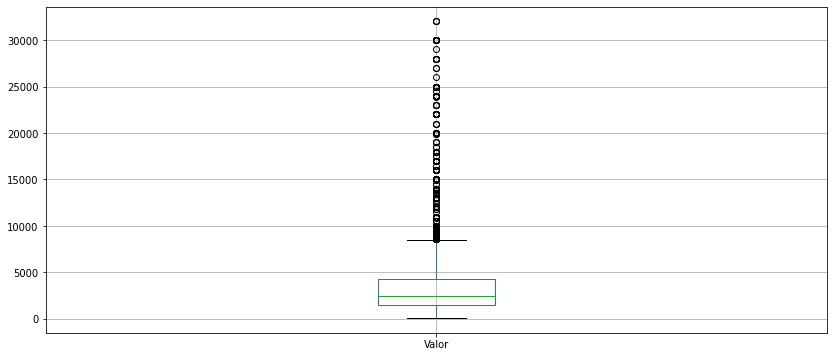

In [53]:
dados.boxplot(["Valor"])

In [54]:
dados[dados.Valor >= 500000]

Empty DataFrame
Columns: [Tipo, Bairro, Quartos, Vagas, Suites, Area, Valor, Condominio, IPTU, Valor m2, Tipo Agregado, Valor Bruto, Valor Bruto m2]
Index: []

In [55]:
valor= dados.Valor
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ


In [56]:
# removendo outliers
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
# removendo outliers
dados_new = dados[selecao]

<AxesSubplot:>

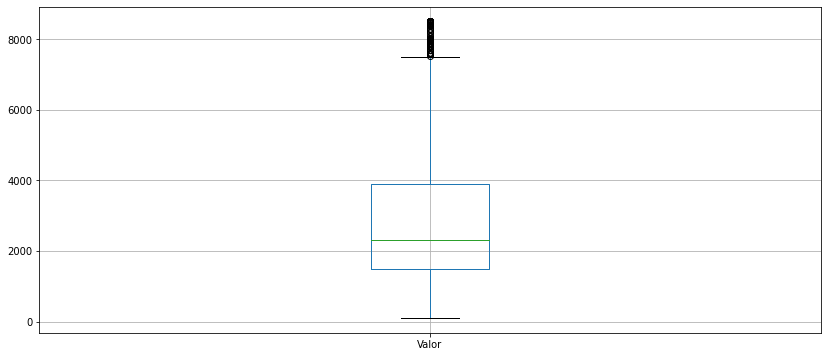

In [57]:
dados_new.boxplot(["Valor"])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

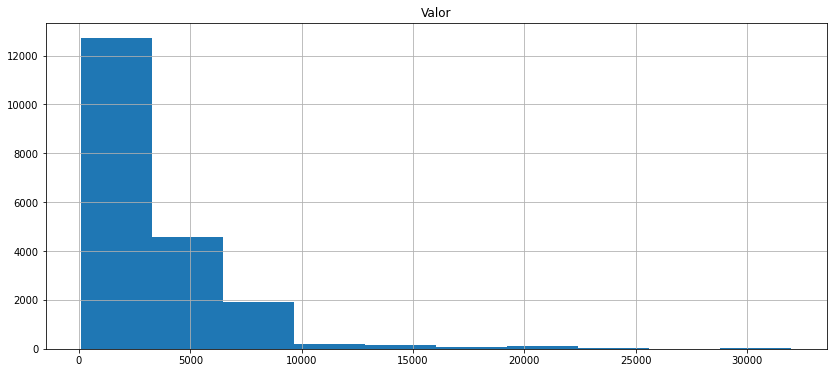

In [58]:
dados.hist(["Valor"])


array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

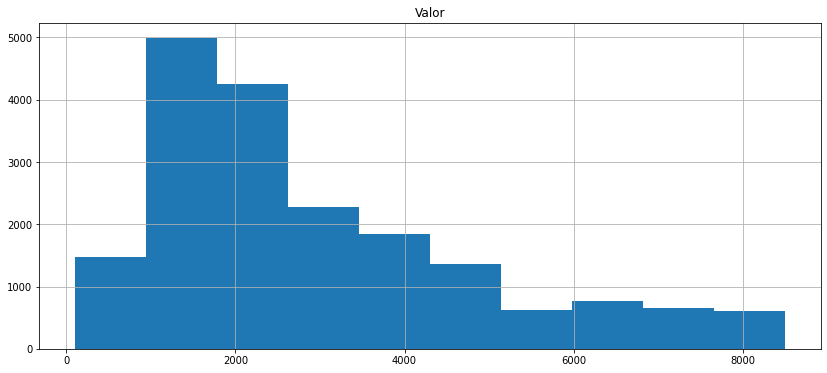

In [59]:
dados_new.hist(["Valor"])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

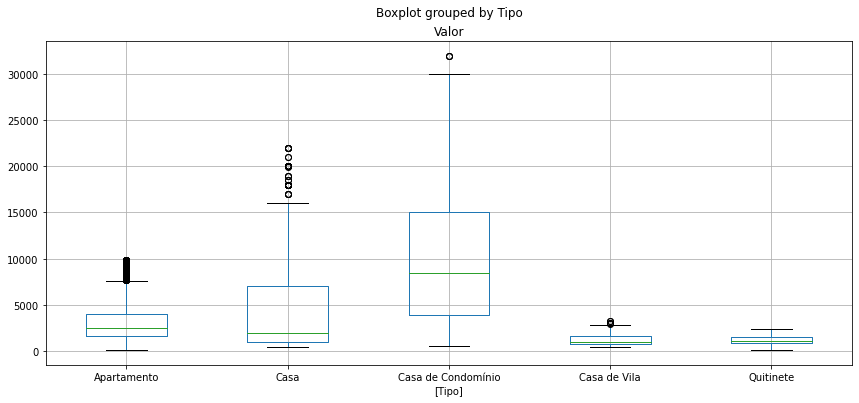

In [60]:
dados.boxplot(["Valor"], by=["Tipo"])

In [61]:
grupo_tipo = dados.groupby("Tipo")["Valor"]
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [62]:
grupo_tipo.groups

{'Apartamento': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], 'Casa': [16923, 16924, 16925, 16926, 16927, 16928, 16929, 16930, 16931, 16932, 16933, 16934, 16935, 16936, 16937, 16938, 16939, 16940, 16941, 16942, 16943, 16944, 16945, 16946, 16947, 16948, 16949, 16950, 16951, 16952, 16953, 16954, 16955, 16956, 16957, 16958, 16959, 16960, 16961, 16962, 16963, 16964, 16965, 16966, 16967, 16968, 16969, 16970, 16971, 16972, 16973, 16974, 16975, 16976, 16977, 16978, 16979, 16980, 16981, 16982, 16983, 16984, 16985, 16986, 16987, 16988, 16989, 16990, 16991, 16992, 16993, 16994, 16995, 16996, 16997, 16998, 16999, 17000, 17001, 17002, 17003, 17004, 1700

In [63]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [64]:
limite_superior.Casa

16000.0

In [65]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
  eh_tipo = dados.Tipo == tipo
  eh_dentro_limite = (dados.Valor >= limite_inferior[tipo]) & (dados.Valor <= limite_superior[tipo])
  selecao = eh_tipo & eh_dentro_limite

  dados_selecao = dados[selecao]
  dados_new = pd.concat([dados_new, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

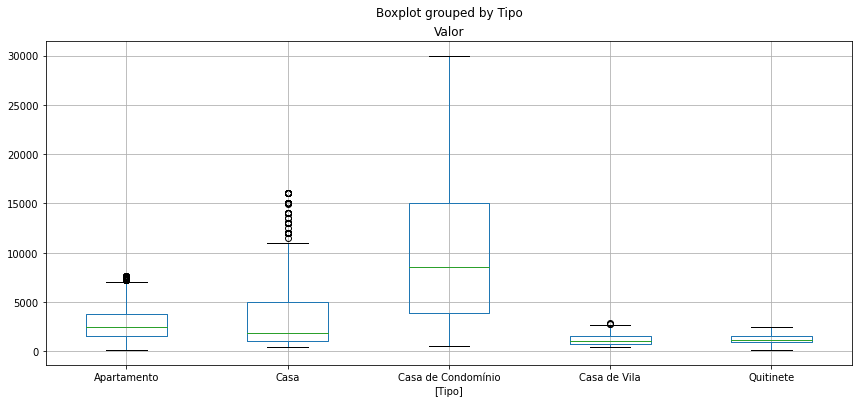

In [66]:
dados_new.boxplot(["Valor"], by=["Tipo"])

In [67]:
dados_new.to_csv("aluguel_residencial_sem_outliers", sep=";", index=False)

# AULA EXTRA 01 

In [68]:
import pandas as pd
json = open("aluguel.json")
df_json = pd.read_json("aluguel.json")


In [69]:
df_txt = pd.read_table("aluguel.txt")
df_txt

Tipo           Bairro  Quartos  Vagas  Suites  Area  \
0                Quitinete       Copacabana        1      0       0    40   
1                     Casa  Jardim Botânico        2      0       1   100   
2  Conjunto Comercial/Sala  Barra da Tijuca        0      4       0   150   
3              Apartamento           Centro        1      0       0    15   
4              Apartamento     Higienópolis        1      0       0    48   
5              Apartamento     Vista Alegre        3      1       0    70   
6              Apartamento         Cachambi        2      0       0    50   
7       Casa de Condomínio  Barra da Tijuca        5      4       5   750   
8       Casa de Condomínio            Ramos        2      2       0    65   
9  Conjunto Comercial/Sala           Centro        0      3       0   695   

   Valor  Condominio    IPTU  
0   1700       500.0    60.0  
1   7000         NaN     NaN  
2   5200      4020.0  1111.0  
3    800       390.0    20.0  
4    800       230.0     NaN  
5   1200         NaN     NaN  
6   1300       301.0    17.0  
7  22000         NaN     NaN  
8   1000         NaN     NaN  
9  35000     19193.0  3030.0

In [70]:
df_xlsx = pd.read_excel("aluguel.xlsx")
df_xlsx

Tipo           Bairro  Quartos  Vagas  Suites  Area  \
0                Quitinete       Copacabana        1      0       0    40   
1                     Casa  Jardim Botânico        2      0       1   100   
2  Conjunto Comercial/Sala  Barra da Tijuca        0      4       0   150   
3              Apartamento           Centro        1      0       0    15   
4              Apartamento     Higienópolis        1      0       0    48   
5              Apartamento     Vista Alegre        3      1       0    70   
6              Apartamento         Cachambi        2      0       0    50   
7       Casa de Condomínio  Barra da Tijuca        5      4       5   750   
8       Casa de Condomínio            Ramos        2      2       0    65   
9  Conjunto Comercial/Sala           Centro        0      3       0   695   

   Valor  Condominio    IPTU  
0   1700       500.0    60.0  
1   7000         NaN     NaN  
2   5200      4020.0  1111.0  
3    800       390.0    20.0  
4    800       230.0     NaN  
5   1200         NaN     NaN  
6   1300       301.0    17.0  
7  22000         NaN     NaN  
8   1000         NaN     NaN  
9  35000     19193.0  3030.0

In [71]:
df_html = pd.read_html("dados_html_1.html")
df_html

[  FAIXA ETÁRIA UNAFISCO SAÚDE SOFT II SOFT PARTICIPATIVO      UNIQUE
 0      00 A 18               R$218,99           R$192,60    R$334,48
 1      19 A 23               R$263,63           R$207,67    R$380,06
 2      24 A 28               R$322,44           R$224,26    R$464,39
 3      29 A 33               R$402,05           R$258,63    R$566,68
 4      34 A 38               R$455,17           R$306,37    R$664,61
 5      39 A 43               R$489,29           R$417,93    R$742,72
 6      44 A 48               R$582,65           R$495,24    R$869,47
 7      49 A 53               R$718,86           R$562,64  R$1.046,29
 8      54 A 58               R$908,54           R$721,00  R$1.355,74
 9   59 OU MAIS             R$1.244,50         R$1.151,62  R$2.003,53]

In [72]:
df_html_2 = pd.read_html("dados_html_2.html")
df_html_2
len(df_html_2)
df_html_2[0]
df_html_2[1]
df_html_2[2]

Date Borrowings from the Federal Reserve  \
                  Date                               Total   
0              Month 2                             Month 2   
1            Apr. 2017                                  45   
2             May 2017                                  56   
3            June 2017                                  95   
4            July 2017                                 166   
5            Aug. 2017                                 220   
6           Sept. 2017                                 224   
7            Oct. 2017                                 151   
8            Nov. 2017                                  65   
9            Dec. 2017                                  75   
10           Jan. 2018                                  58   
11           Feb. 2018                                  20   
12           Mar. 2018                                  16   
13           Apr. 2018                                  51   
14                 NaN                                 NaN   
15  Two weeks ending 3                  Two weeks ending 3   
16       Mar. 14, 2018                                  12   
17       Mar. 28, 2018                                  18   
18       Apr. 11, 2018                                  30   
19       Apr. 25, 2018                                  49   
20         May 9, 2018                                 102   

                                                                \
               Primary           Secondary            Seasonal   
0              Month 2             Month 2             Month 2   
1                   21                   0                  24   
2                   11                   0                  44   
3                   15                   0                  80   
4                   12                   0                 154   
5                    7                   0                 213   
6                   10                   0                 214   
7                    4                   0                 146   
8                   11                   0                  54   
9                   43                   0                  33   
10                  51                   0                   7   
11                   7                   0                  14   
12                   4                   0                  12   
13                  16                   0                  35   
14                 NaN                 NaN                 NaN   
15  Two weeks ending 3  Two weeks ending 3  Two weeks ending 3   
16                   3                   0                  10   
17                   5                   0                  13   
18                   6                   0                  24   
19                  15                   0                  35   
20                  43                   0                  59   

                           Nonborrowed reserves 1  
   Other credit extensions Nonborrowed reserves 1  
0                  Month 2                Month 2  
1                        0                2344767  
2                        0                2288880  
3                        0                2269588  
4                        0                2296763  
5                        0                2406953  
6                        0                2357651  
7                        0                2310751  
8                        0                2378217  
9                        0                2309747  
10                       0                2280960  
11                       0                2305236  
12                       0                2230859  
13                       0                2150996  
14                     NaN                    NaN  
15      Two weeks ending 3     Two weeks ending 3  
16                       0                2290422  
17                       0                2184197  
18                       0      

# AULA EXTRA 02

## Series

In [73]:
data = [1,2,3,4,5]
s = pd.Series(data)
s

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [74]:
index = ['Linha'+str(i) for i in range(5)]
index

['Linha0', 'Linha1', 'Linha2', 'Linha3', 'Linha4']

In [75]:
s = pd.Series(data=data, index=index)
s

Linha0    1
Linha1    2
Linha2    3
Linha3    4
Linha4    5
dtype: int64

In [76]:
data = {"Linha"+ str(i): i + 1 for i in range(5)}
data
s = pd.Series(data)
s

Linha0    1
Linha1    2
Linha2    3
Linha3    4
Linha4    5
dtype: int64

In [77]:
s1 = s + 2
s2 = s + s1
s2

Linha0     4
Linha1     6
Linha2     8
Linha3    10
Linha4    12
dtype: int64

## DataFrame

In [78]:
data = [[1,2,3],
        [4,5,6],
        [7,8,9]]
df1 = pd.DataFrame(data=data)
df1

0  1  2
0  1  2  3
1  4  5  6
2  7  8  9

In [79]:
index = ["Linha" + str(i) for i in range(3)]
index

['Linha0', 'Linha1', 'Linha2']

In [80]:
df1 = pd.DataFrame(data=data, index=index)
df1

0  1  2
Linha0  1  2  3
Linha1  4  5  6
Linha2  7  8  9

In [81]:
columns = ["Coluna" + str(i) for i in range(3)]
columns

['Coluna0', 'Coluna1', 'Coluna2']

In [82]:
df1 = pd.DataFrame(data=data, index=index, columns=columns)
df1

Coluna0  Coluna1  Coluna2
Linha0        1        2        3
Linha1        4        5        6
Linha2        7        8        9

In [83]:
df1[df1 > 0] = 'A'
df1

Coluna0 Coluna1 Coluna2
Linha0       A       A       A
Linha1       A       A       A
Linha2       A       A       A

In [84]:
df2 = pd.DataFrame(data= data, index = index, columns=columns)
df2


Coluna0  Coluna1  Coluna2
Linha0        1        2        3
Linha1        4        5        6
Linha2        7        8        9

In [85]:
df2

Coluna0  Coluna1  Coluna2
Linha0        1        2        3
Linha1        4        5        6
Linha2        7        8        9

In [86]:
df3 = pd.DataFrame(data= data, index = index, columns=columns)
df3[df3> 0] = 'C'
df3

Coluna0 Coluna1 Coluna2
Linha0       C       C       C
Linha1       C       C       C
Linha2       C       C       C

In [87]:
df4 = pd.concat([df1, df2, df3])
df4

Coluna0 Coluna1 Coluna2
Linha0       A       A       A
Linha1       A       A       A
Linha2       A       A       A
Linha0       1       2       3
Linha1       4       5       6
Linha2       7       8       9
Linha0       C       C       C
Linha1       C       C       C
Linha2       C       C       C

In [88]:
df4 = pd.concat([df1, df2, df3], axis=1)
df4

Coluna0 Coluna1 Coluna2 Coluna0 Coluna1 Coluna2 Coluna0 Coluna1 Coluna2
Linha0       A       A       A       1       2       3       C       C       C
Linha1       A       A       A       4       5       6       C       C       C
Linha2       A       A       A       7       8       9       C       C       C

In [89]:
import pandas as pd

numeros = [i for i in range(11)]
letras = [chr(i + 65) for i in range(11)]
nome_coluna = ['N']

df = pd.DataFrame(data = numeros, index = letras, columns = nome_coluna)

In [90]:
selecao = df['N'].isin([i for i in range(11) if i % 2 == 0])
df = df[selecao]
df

N
A   0
C   2
E   4
G   6
I   8
K  10

# AULA EXTRA 03

In [91]:
data = [[1,2,3], [4,5,6], [7,8,9]]
data

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [92]:
df = pd.DataFrame(data, list("321"), list("ZYX"))
df

Z  Y  X
3  1  2  3
2  4  5  6
1  7  8  9

In [93]:
df.sort_index(inplace=True)
df

Z  Y  X
1  7  8  9
2  4  5  6
3  1  2  3

In [94]:
df.sort_index(inplace=True, axis=1)
df

X  Y  Z
1  9  8  7
2  6  5  4
3  3  2  1

In [95]:
df.sort_values(by="X", inplace=True)
df

X  Y  Z
3  3  2  1
2  6  5  4
1  9  8  7

In [96]:
df.sort_values(by="3", inplace=True, axis=1)
df

Z  Y  X
3  1  2  3
2  4  5  6
1  7  8  9

In [97]:
df.sort_values(by=["X", "Y"], inplace=True)
df

Z  Y  X
3  1  2  3
2  4  5  6
1  7  8  9

# AULA EXTRA 04

In [98]:
import pandas as pd
data = [
        (1,2,3,4),
        (5,6,7,8),
        (8, 10, 11, 12),
        (13,14,15,16)
]
df = pd.DataFrame(data, "l1 l2 l3 l4".split(), "c1 c2 c3 c4".split())
df

c1  c2  c3  c4
l1   1   2   3   4
l2   5   6   7   8
l3   8  10  11  12
l4  13  14  15  16

In [99]:
df[0:1]

c1  c2  c3  c4
l1   1   2   3   4

In [100]:
df.loc["l3"]

c1     8
c2    10
c3    11
c4    12
Name: l3, dtype: int64

In [101]:
df.loc[["l3", "l2"]]

c1  c2  c3  c4
l3   8  10  11  12
l2   5   6   7   8

In [102]:
df.loc["l1", "c2"]

2

In [103]:
df.iloc[0, 1]

2

In [104]:
df.iloc[[2, 0], [3, 0]]

c4  c1
l3  12   8
l1   4   1

# AULA EXTRA 05

In [105]:
import pandas as pd

In [106]:
data = [0.5, None, None, 0.52, 0.54, None, None, 0.59, 0.6, None, 0.7]
data
s = pd.Series(data)
s

0     0.50
1      NaN
2      NaN
3     0.52
4     0.54
5      NaN
6      NaN
7     0.59
8     0.60
9      NaN
10    0.70
dtype: float64

In [107]:
s.fillna(0)

0     0.50
1     0.00
2     0.00
3     0.52
4     0.54
5     0.00
6     0.00
7     0.59
8     0.60
9     0.00
10    0.70
dtype: float64

In [108]:
# se o valor atual não é válido, usa-se o último valor válido
s.fillna(method="ffill")

0     0.50
1     0.50
2     0.50
3     0.52
4     0.54
5     0.54
6     0.54
7     0.59
8     0.60
9     0.60
10    0.70
dtype: float64

In [109]:
# se o valor atual não é válido, usa-se o último valor válido, porém, de baixo pra cima
s.fillna(method="bfill")

0     0.50
1     0.52
2     0.52
3     0.52
4     0.54
5     0.59
6     0.59
7     0.59
8     0.60
9     0.70
10    0.70
dtype: float64

In [110]:
s.fillna(s.mean())

0     0.500
1     0.575
2     0.575
3     0.520
4     0.540
5     0.575
6     0.575
7     0.590
8     0.600
9     0.575
10    0.700
dtype: float64

In [111]:
s1 = s.fillna(method="ffill", limit=1)
s1.fillna(method="bfill", limit=1)
s1

0     0.50
1     0.50
2      NaN
3     0.52
4     0.54
5     0.54
6      NaN
7     0.59
8     0.60
9     0.60
10    0.70
dtype: float64

# AULA EXTRA 06

In [112]:
s = pd.Series(list("edaedadsadaedadasdaedaedasdsadeasdasd"))
s

0     e
1     d
2     a
3     e
4     d
5     a
6     d
7     s
8     a
9     d
10    a
11    e
12    d
13    a
14    d
15    a
16    s
17    d
18    a
19    e
20    d
21    a
22    e
23    d
24    a
25    s
26    d
27    s
28    a
29    d
30    e
31    a
32    s
33    d
34    a
35    s
36    d
dtype: object

In [113]:
s.unique()

array(['e', 'd', 'a', 's'], dtype=object)

In [114]:
s.value_counts()

d    13
a    12
e     6
s     6
dtype: int64

In [115]:
dados=pd.read_csv("aluguel.csv", sep=";")
dados.head()

Tipo               Bairro  Quartos  Vagas  Suites  Area   Valor  \
0  Apartamento               Centro        1      0       0    15   800.0   
1  Apartamento         Higienópolis        1      0       0    48   800.0   
2  Apartamento             Cachambi        2      0       0    50  1300.0   
3  Apartamento               Grajaú        2      1       0    70  1500.0   
4  Apartamento  Lins de Vasconcelos        3      1       1    90  1500.0   

   Condominio  IPTU  Valor m2 Tipo Agregado  
0       390.0  20.0     53.33   Apartamento  
1       230.0   0.0     16.67   Apartamento  
2       301.0  17.0     26.00   Apartamento  
3       642.0  74.0     21.43   Apartamento  
4       455.0  14.0     16.67   Apartamento

In [116]:
dados.Tipo.unique()

array(['Apartamento', 'Casa', 'Casa de Condomínio', 'Casa de Vila',
       'Quitinete'], dtype=object)

In [117]:
dados.Tipo.value_counts()

Apartamento           16923
Casa de Condomínio      964
Casa                    898
Quitinete               813
Casa de Vila            233
Name: Tipo, dtype: int64

# AULA EXTRA 07

## 1 e 2 quartos
## 3 e 4 quartos
## 5 e 6 quartos
## 7 ou mais quartos

In [118]:
dados = pd.read_csv("aluguel.csv", sep=";")
dados.head()

Tipo               Bairro  Quartos  Vagas  Suites  Area   Valor  \
0  Apartamento               Centro        1      0       0    15   800.0   
1  Apartamento         Higienópolis        1      0       0    48   800.0   
2  Apartamento             Cachambi        2      0       0    50  1300.0   
3  Apartamento               Grajaú        2      1       0    70  1500.0   
4  Apartamento  Lins de Vasconcelos        3      1       1    90  1500.0   

   Condominio  IPTU  Valor m2 Tipo Agregado  
0       390.0  20.0     53.33   Apartamento  
1       230.0   0.0     16.67   Apartamento  
2       301.0  17.0     26.00   Apartamento  
3       642.0  74.0     21.43   Apartamento  
4       455.0  14.0     16.67   Apartamento

In [119]:
classes = [0, 2, 4, 6, float("inf")]
quartos = pd.cut(dados.Quartos, classes)
quartos

0        (0.0, 2.0]
1        (0.0, 2.0]
2        (0.0, 2.0]
3        (0.0, 2.0]
4        (2.0, 4.0]
            ...    
19826    (0.0, 2.0]
19827    (0.0, 2.0]
19828    (0.0, 2.0]
19829    (0.0, 2.0]
19830           NaN
Name: Quartos, Length: 19831, dtype: category
Categories (4, interval[float64]): [(0.0, 2.0] < (2.0, 4.0] < (4.0, 6.0] < (6.0, inf]]

In [120]:
labels = ["0 e 2 quartos", "3 e 4  quartos", "5 e 6 quartos", "7 quartos ou mais"]
quartos = pd.cut(dados.Quartos, classes, labels=labels, include_lowest=True)
pd.value_counts(quartos)

0 e 2 quartos        11231
3 e 4  quartos        8094
5 e 6 quartos          470
7 quartos ou mais       36
Name: Quartos, dtype: int64

# AULA EXTRA 08

In [121]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rc("figure", figsize=(15, 8))

dados = pd.read_csv("aluguel.csv", sep=";")
dados.head()

Tipo               Bairro  Quartos  Vagas  Suites  Area   Valor  \
0  Apartamento               Centro        1      0       0    15   800.0   
1  Apartamento         Higienópolis        1      0       0    48   800.0   
2  Apartamento             Cachambi        2      0       0    50  1300.0   
3  Apartamento               Grajaú        2      1       0    70  1500.0   
4  Apartamento  Lins de Vasconcelos        3      1       1    90  1500.0   

   Condominio  IPTU  Valor m2 Tipo Agregado  
0       390.0  20.0     53.33   Apartamento  
1       230.0   0.0     16.67   Apartamento  
2       301.0  17.0     26.00   Apartamento  
3       642.0  74.0     21.43   Apartamento  
4       455.0  14.0     16.67   Apartamento

In [122]:
area = plt.figure()

<Figure size 1080x576 with 0 Axes>

In [123]:
g1 = area.add_subplot(2, 2, 1)
g2 = area.add_subplot(2, 2, 2)
g3 = area.add_subplot(2, 2, 3)
g4 = area.add_subplot(2, 2, 4)

In [124]:
g1.scatter(dados.Valor, dados.Area)
g1.set_title("Valos vs Área")

g2.hist(dados.Valor)
g2.set_title("Histograma")

# returns random sample
dados_g3 = dados.Valor.sample(100)
dados_g3.index = range(dados_g3.shape[0])
g3.plot(dados_g3)
g3.set_title("Amostra (Valor)")

grupo = dados.groupby("Tipo")["Valor"]
label = grupo.mean().index
valores = grupo.mean().values
g4.bar(label, valores)
g4.set_title("Valor Médio por Tipo")

Text(0.5, 1.0, 'Valor Médio por Tipo')

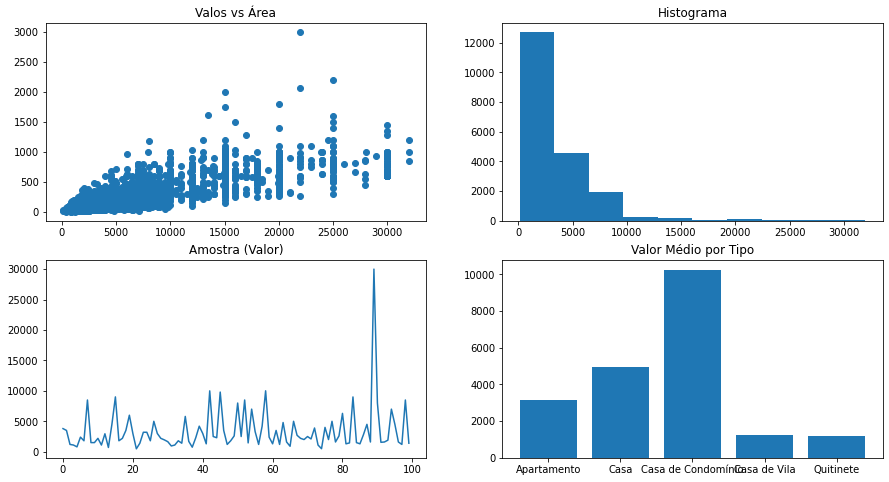

In [125]:
area

In [126]:
area.savefig("grafico.png", dpi=300, bbox_inches="tight")

# AULA EXTRA 09

In [150]:
%matplotlib inline

plt.rc("figure", figsize=(14, 6))

dados = pd.read_csv("aluguel.csv", sep=";")
dados.head()

Tipo               Bairro  Quartos  Vagas  Suites  Area   Valor  \
0  Apartamento               Centro        1      0       0    15   800.0   
1  Apartamento         Higienópolis        1      0       0    48   800.0   
2  Apartamento             Cachambi        2      0       0    50  1300.0   
3  Apartamento               Grajaú        2      1       0    70  1500.0   
4  Apartamento  Lins de Vasconcelos        3      1       1    90  1500.0   

   Condominio  IPTU  Valor m2 Tipo Agregado  
0       390.0  20.0     53.33   Apartamento  
1       230.0   0.0     16.67   Apartamento  
2       301.0  17.0     26.00   Apartamento  
3       642.0  74.0     21.43   Apartamento  
4       455.0  14.0     16.67   Apartamento

In [168]:
area = plt.figure()

<Figure size 1008x432 with 0 Axes>

In [169]:
g1 = area.add_subplot(2, 2, 1)
g2 = area.add_subplot(2, 2, 2)
g3 = area.add_subplot(2, 2, 3)
g4 = area.add_subplot(2, 2, 4)

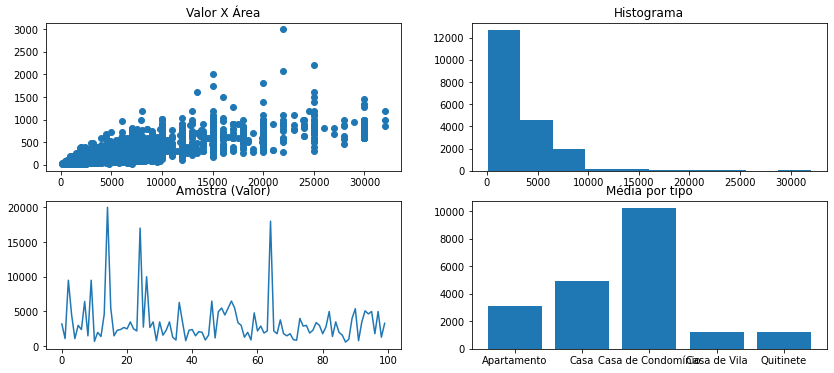

In [170]:
g1.scatter(dados.Valor, dados.Area)
g1.set_title('Valor X Área')

g2.hist(dados.Valor)
g2.set_title('Histograma')

dados_g3 = dados.Valor.sample(100)
dados_g3.index = range(dados_g3.shape[0])
g3.plot(dados_g3)
g3.set_title('Amostra (Valor)')

grupo = dados.groupby('Tipo')['Valor']
label = grupo.mean().index
valores = grupo.mean().values
g4.bar(label, valores)
g4.set_title('Média por tipo')

area

In [171]:
area.savefig('grafico.png', dpi = 300, bbox_inches = 'tight')

# ATIVIDADES

In [127]:
import pandas as pd
alunos = pd.DataFrame({'Nome': ['Ary', 'Cátia', 'Denis', 'Beto', 'Bruna', 'Dara', 'Carlos', 'Alice'], 
                        'Sexo': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'], 
                        'Idade': [15, 27, 56, 32, 42, 21, 19, 35], 
                        'Notas': [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6], 
                        'Aprovado': [True, False, False, True, True, True, False, False]}, 
                        columns = ['Nome', 'Idade', 'Sexo', 'Notas', 'Aprovado'])

selecao = alunos.Aprovado == True

aprovados = alunos[selecao]
aprovados

Nome  Idade Sexo  Notas  Aprovado
0    Ary     15    M    7.5      True
3   Beto     32    M   10.0      True
4  Bruna     42    F    8.2      True
5   Dara     21    F    7.0      True

In [128]:
selecao = (alunos.Aprovado == True) & (alunos.Sexo == "F") 
aprovadas = alunos[selecao]
aprovadas

Nome  Idade Sexo  Notas  Aprovado
4  Bruna     42    F    8.2      True
5   Dara     21    F    7.0      True

In [129]:
selecao = ((alunos.Idade > 10) & (alunos.Idade < 20)) | (alunos.Idade >= 40)
alunos_por_idade = alunos[selecao]
alunos_por_idade

Nome  Idade Sexo  Notas  Aprovado
0     Ary     15    M    7.5      True
2   Denis     56    M    5.0     False
4   Bruna     42    F    8.2      True
6  Carlos     19    M    6.0     False

In [130]:

selecao = alunos['Aprovado'] == False
reprovados = alunos.loc[selecao, ['Nome', 'Sexo', 'Idade']]
reprovados

Nome Sexo  Idade
1   Cátia    F     27
2   Denis    M     56
6  Carlos    M     19
7   Alice    F     35

In [131]:
selecao = alunos['Aprovado'] == False
reprovados = alunos[['Nome', 'Sexo', 'Idade']][selecao]
reprovados

Nome Sexo  Idade
1   Cátia    F     27
2   Denis    M     56
6  Carlos    M     19
7   Alice    F     35

In [132]:
alunos.sort_values(by = ['Idade'], inplace = True)
alunos.iloc[0:3:]

Nome  Idade Sexo  Notas  Aprovado
0     Ary     15    M    7.5      True
6  Carlos     19    M    6.0     False
5    Dara     21    F    7.0      True

In [133]:
imoveis = pd.DataFrame([['Apartamento', None, 970, 68], 
                        ['Apartamento', 2000, 878, 112], 
                        ['Casa', 5000, None, 500], 
                        ['Apartamento', None, 1010, 170], 
                        ['Apartamento', 1500, 850, None], 
                        ['Casa', None, None, None], 
                        ['Apartamento', 2000, 878, None], 
                        ['Apartamento', 1550, None, 228], 
                        ['Apartamento', 2500, 880, 195]], 
                        columns = ['Tipo', 'Valor', 'Condominio', 'IPTU'])
imoveis

Tipo   Valor  Condominio   IPTU
0  Apartamento     NaN       970.0   68.0
1  Apartamento  2000.0       878.0  112.0
2         Casa  5000.0         NaN  500.0
3  Apartamento     NaN      1010.0  170.0
4  Apartamento  1500.0       850.0    NaN
5         Casa     NaN         NaN    NaN
6  Apartamento  2000.0       878.0    NaN
7  Apartamento  1550.0         NaN  228.0
8  Apartamento  2500.0       880.0  195.0

In [134]:
precos = pd.DataFrame([['Feira', 'Cebola', 2.5], 
                        ['Mercado', 'Cebola', 1.99], 
                        ['Supermercado', 'Cebola', 1.69], 
                        ['Feira', 'Tomate', 4], 
                        ['Mercado', 'Tomate', 3.29], 
                        ['Supermercado', 'Tomate', 2.99], 
                        ['Feira', 'Batata', 4.2], 
                        ['Mercado', 'Batata', 3.99], 
                        ['Supermercado', 'Batata', 3.69]], 
                        columns = ['Local', 'Produto', 'Preço'])
precos

Local Produto  Preço
0         Feira  Cebola   2.50
1       Mercado  Cebola   1.99
2  Supermercado  Cebola   1.69
3         Feira  Tomate   4.00
4       Mercado  Tomate   3.29
5  Supermercado  Tomate   2.99
6         Feira  Batata   4.20
7       Mercado  Batata   3.99
8  Supermercado  Batata   3.69

In [135]:
produtos = precos.groupby('Produto')
produtos.describe().round(2)

Preço                                         
        count  mean   std   min   25%   50%   75%  max
Produto                                               
Batata    3.0  3.96  0.26  3.69  3.84  3.99  4.10  4.2
Cebola    3.0  2.06  0.41  1.69  1.84  1.99  2.24  2.5
Tomate    3.0  3.43  0.52  2.99  3.14  3.29  3.64  4.0

In [136]:
estatisticas = ['mean', 'std', 'min', 'max']
nomes = {'mean': 'Média', 'std': 'Desvio Padrão', 
    'min': 'Mínimo', 'max': 'Máximo'}
produtos['Preço'].aggregate(estatisticas).rename(columns = nomes).round(2)

Média  Desvio Padrão  Mínimo  Máximo
Produto                                      
Batata    3.96           0.26    3.69     4.2
Cebola    2.06           0.41    1.69     2.5
Tomate    3.43           0.52    2.99     4.0

## Estatísticas do box plot

In [137]:
plt.rc("figure", figsize=(14, 6))

dados_amostra = pd.read_csv("aluguel_amostra.csv", sep=";")
dados_amostra.head()

Tipo                    Bairro  Quartos  Vagas  Suites  Area  \
0  Apartamento  Recreio dos Bandeirantes        3      2       1   320   
1  Apartamento                  Maracanã        2      0       0    59   
2  Apartamento                    Leblon        3      2       1   147   
3  Apartamento               São Conrado        3      3       3   270   
4  Apartamento                    Tijuca        2      1       0    65   

     Valor  Condominio    IPTU  Valor m2 Tipo Agregado  
0   3200.0      1319.0     0.0     10.00   Apartamento  
1    800.0       725.0    47.0     13.56   Apartamento  
2   7500.0      1000.0   381.0     51.02   Apartamento  
3  14999.0      2800.0  1200.0     55.55   Apartamento  
4   1200.0       640.0    97.0     18.46   Apartamento

In [138]:
valor= dados_amostra["Valor m2"]
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [139]:
print(f"""q1->{Q1} 
q3->{Q3} 
IIQ->{IIQ} 
limite_inferior->{limite_inferior} 
limite_superior->{limite_superior}""")

q1->21.25 
q3->42.31 
IIQ->21.060000000000002 
limite_inferior->-10.340000000000003 
limite_superior->73.9
